In [3]:
import numpy as np
import pandas as pd

In [4]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data=data.drop(['Id'],axis=1)

In [6]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.shape


(150, 5)

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data.columns[4]

'Species'

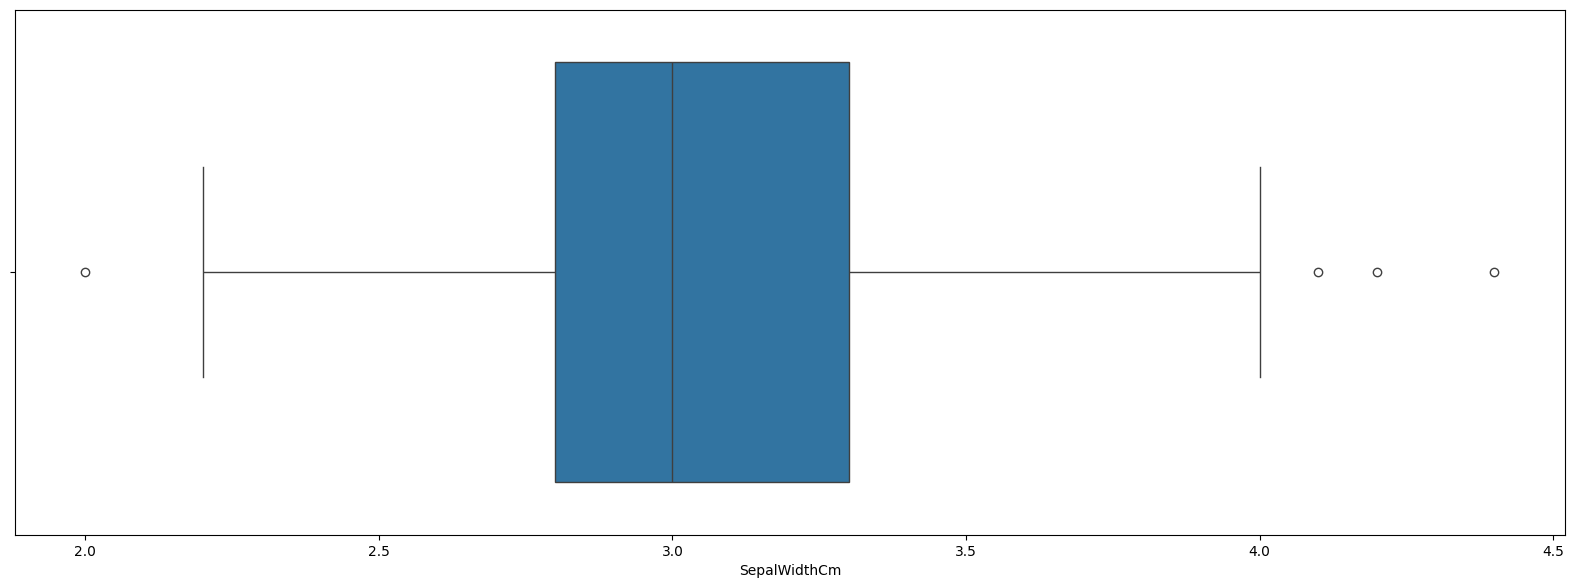

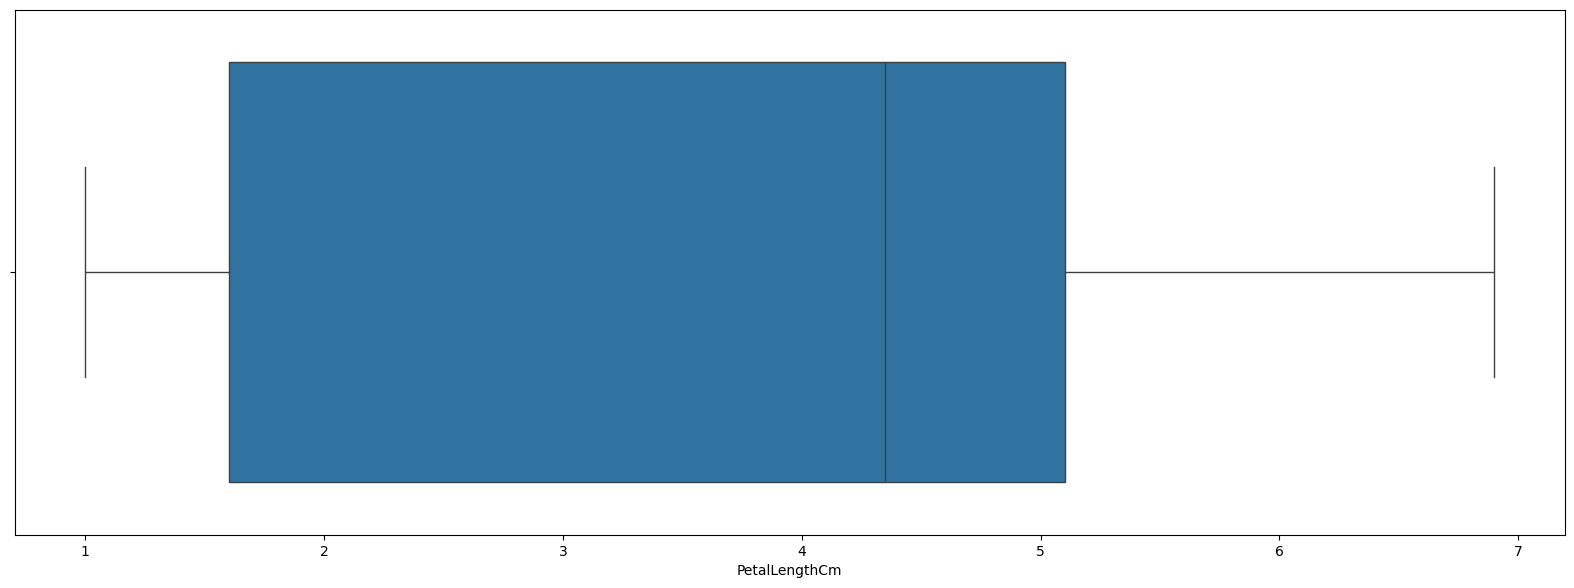

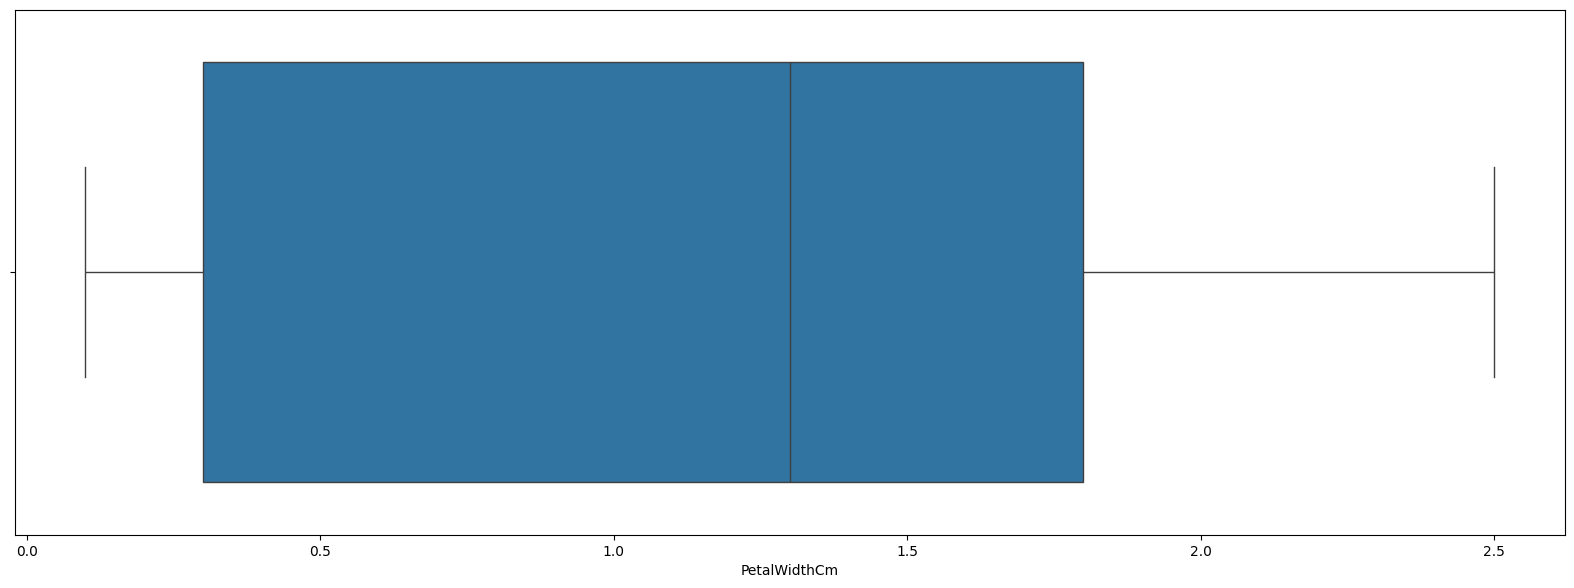

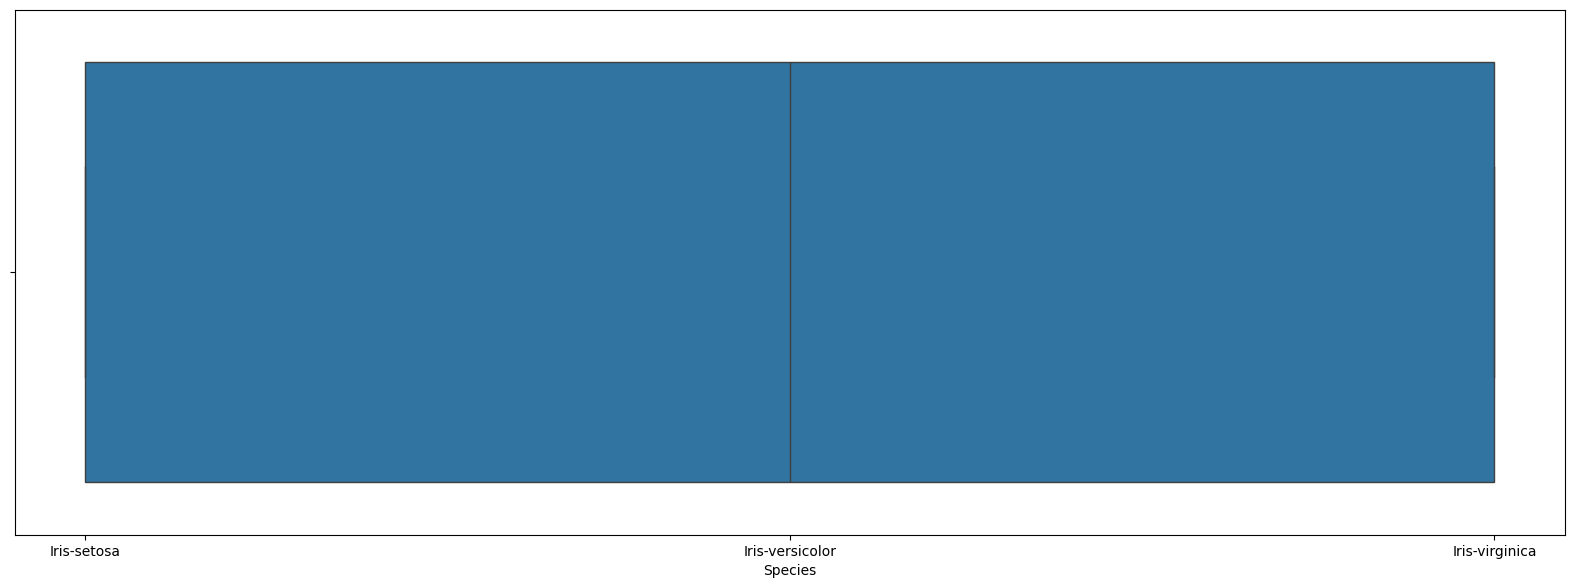

In [11]:
# Checking outliers
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(1,5):
    plt.figure(figsize=(20,15))
    plt.subplot(2,1,1)
    sns.boxplot(data=data,x=data[data.columns[i]])

In [27]:
target=data.Species
inputs=data.drop('Species',axis='columns')
inputs



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
dumies=pd.get_dummies(target,dtype=int)
dumies['encoded_label'] = dumies.idxmax(axis=1).map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
dumies
labeltarget=dumies.encoded_label
labeltarget


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: encoded_label, Length: 150, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs,labeltarget, test_size=0.2, random_state=62)
# # Ensure y_train is a Pandas Series
# y_train = pd.Series(y_train)

In [55]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [64]:
model.fit(x_train,y_train)

GaussianNB()

In [70]:
predictions=model.predict(x_test)




In [66]:
accuracy=model.score(x_test,y_test)
accuracy

0.9333333333333333

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Extract TP, FP, TN, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positive
FP = conf_matrix[0, 1]  # False Positive
TN = conf_matrix[0, 0]  # True Negative
FN = conf_matrix[1, 0]  # False Negative


In [76]:
# Compute accuracy
accuracy = accuracy_score(y_test, predictions)

# Compute error rate
error_rate = 1 - accuracy

# Compute precision
precision = precision_score(y_test, predictions, average='macro')  # Choose 'micro', 'macro', 'weighted', or None

# Compute recall
recall = recall_score(y_test, predictions, average='macro')  # Choose 'micro', 'macro', 'weighted', or None

# Compute F1 score
f1 = f1_score(y_test, predictions, average='macro')  # Choose 'micro', 'macro', 'weighted', or None


In [77]:
# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nTrue Positive (TP):", TP)
print("False Positive (FP):", FP)
print("True Negative (TN):", TN)
print("False Negative (FN):", FN)
print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]

True Positive (TP): 7
False Positive (FP): 0
True Negative (TN): 12
False Negative (FN): 0

Accuracy: 0.9333333333333333
Error Rate: 0.06666666666666665
Precision: 0.9249999999999999
Recall: 0.9249999999999999
F1 Score: 0.9249999999999999


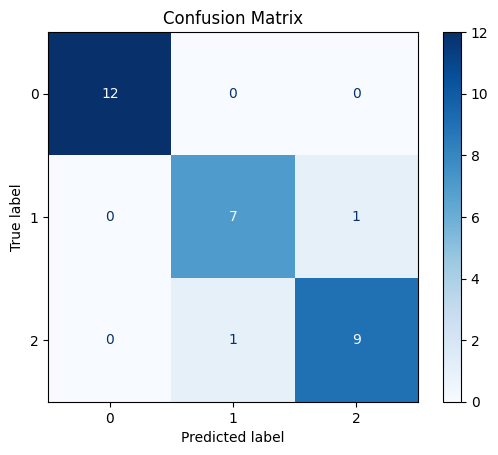

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')  # You can choose a colormap that suits your preference
disp.ax_.set_title('Confusion Matrix')

# Show the plot
plt.show()

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

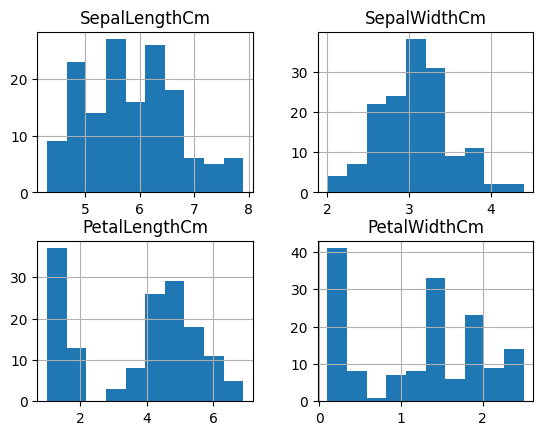

In [81]:
data.hist()